In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для визуализации графиков в блокноте
%matplotlib inline


ModuleNotFoundError: No module named 'pandas'

In [3]:
!pip install pandas numpy matplotlib seaborn

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для визуализации графиков в блокноте
%matplotlib inline


In [6]:
# Загрузка данных о рейтингах и фильмах
ratings = pd.read_csv('../data/raw/ml-latest-small/ratings.csv')
movies = pd.read_csv('../data/raw/ml-latest-small/movies.csv')

# Просмотр первых строк датасета с рейтингами
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Проверка на наличие пропусков
print("Пропуски в данных о рейтингах:\n", ratings.isnull().sum())
print("Пропуски в данных о фильмах:\n", movies.isnull().sum())

# Объединение данных о фильмах и рейтингах
merged_data = pd.merge(ratings, movies, on='movieId')

# Просмотр объединенных данных
merged_data.head()


Пропуски в данных о рейтингах:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Пропуски в данных о фильмах:
 movieId    0
title      0
genres     0
dtype: int64


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


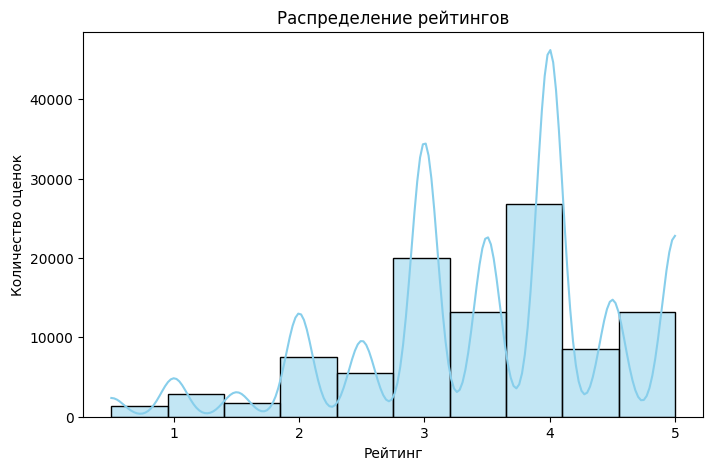

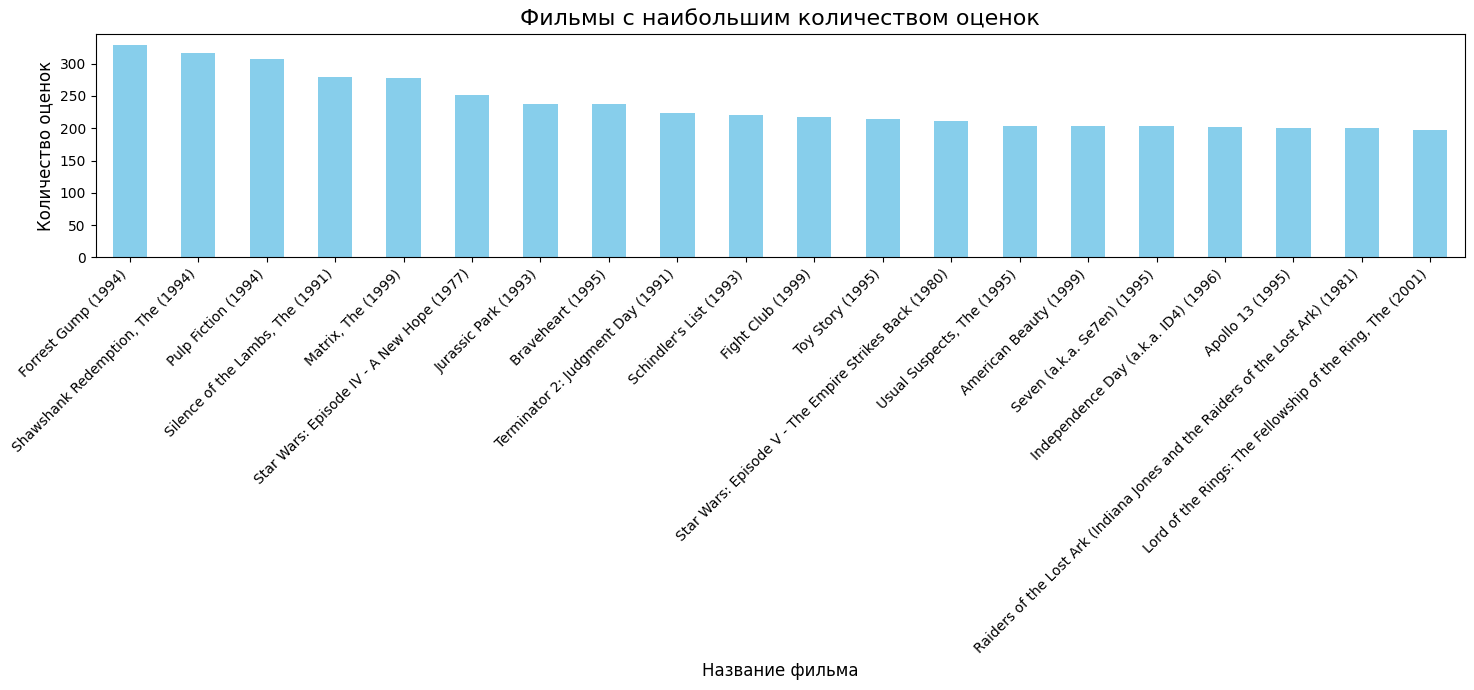

In [10]:
# Распределение рейтингов
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['rating'], bins=10, kde=True, color='skyblue')
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.show()

# Количество оценок на каждый фильм
movie_ratings = merged_data.groupby('title')['rating'].count().sort_values(ascending=False)

# Увеличиваем размер графика
plt.figure(figsize=(15, 7))  # Увеличиваем ширину графика

# Рисуем график
movie_ratings.head(20).plot(kind='bar', color='skyblue')

# Заголовок и метки
plt.title('Фильмы с наибольшим количеством оценок', fontsize=16)
plt.xlabel('Название фильма', fontsize=12)
plt.ylabel('Количество оценок', fontsize=12)

# Изменяем размер шрифта для меток оси X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Показываем график
plt.tight_layout()  # Убирает наложение текста
plt.show()



In [9]:
# Функция для рекомендации популярных фильмов
def recommend_popular_movies(data, n_recommendations=5):
    popular_movies = data.groupby('title').size().sort_values(ascending=False).head(n_recommendations)
    return popular_movies.index

# Рекомендации
print("Рекомендованные фильмы:")
print(recommend_popular_movies(merged_data, 10))


Рекомендованные фильмы:
Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)'],
      dtype='object', name='title')


In [11]:
!pip install scikit-surprise


     ---------------------------------------- 0.0/154.4 kB ? eta -:--:--
     ------------------ -------------------- 71.7/154.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------  297.0/301.8 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 M


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [13]:
# Задаем формат данных
reader = Reader(rating_scale=(1, 5))  # Здесь 1 - минимальный, 5 - максимальный рейтинг

# Создаем датасет
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [14]:
# Разделяем данные на обучающую и тестовую выборки
trainset, testset = train_test_split(data, test_size=0.2)  # 20% данных для тестирования


In [15]:
# Создаем и обучаем модель
model = SVD()
model.fit(trainset)


In [16]:
# Предсказание рейтингов
predictions = model.test(testset)

# Оценка модели с использованием RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")


RMSE: 0.8753
RMSE: 0.88


In [18]:
def get_recommendations(user_id, n_recommendations=5):
    # Получаем список всех фильмов
    all_movie_ids = movies['movieId'].unique()
    
    # Получаем уже просмотренные пользователем фильмы
    watched_movies = ratings[ratings['userId'] == user_id]['movieId'].unique()
    
    # Находим фильмы, которые пользователь еще не смотрел
    unseen_movies = [movie for movie in all_movie_ids if movie not in watched_movies]
    
    # Получаем предсказанные рейтинги для невидимых фильмов
    predictions = [model.predict(user_id, movie) for movie in unseen_movies]
    
    # Сортируем фильмы по предсказанным рейтингам
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Возвращаем n лучших рекомендаций
    recommended_movie_ids = [pred[1] for pred in predictions[:n_recommendations]]  # Изменяем здесь
    recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
    
    return recommended_movies

# Пример использования
user_id = 1  # Выберите ID пользователя
print(get_recommendations(user_id, n_recommendations=5))


     movieId                                              title  \
277      318                   Shawshank Redemption, The (1994)   
602      750  Dr. Strangelove or: How I Learned to Stop Worr...   
659      858                              Godfather, The (1972)   
896     1193             One Flew Over the Cuckoo's Nest (1975)   
901     1199                                      Brazil (1985)   

             genres  
277     Crime|Drama  
602      Comedy|War  
659     Crime|Drama  
896           Drama  
901  Fantasy|Sci-Fi  


FileNotFoundError: [Errno 2] No such file or directory: 'images/example_plot.png'

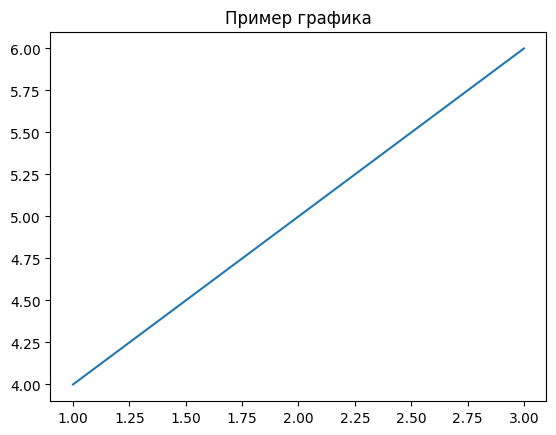

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Создание графика
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Пример графика')
plt.savefig('images/example_plot.png')  # Сохранение графика
plt.close()

# Создание DataFrame с результатами
results = pd.DataFrame({'Column1': [1, 2, 3], 'Column2': [4, 5, 6]})
results.to_csv('images/results.csv', index=False)  # Сохранение в CSV
